In [10]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [43]:
# Paths to your folders
original_folder = "austin1/output_austin1"  # change to your actual folder
mask_folder = "austin1/output_austin1_masks"          # change to your actual folder

austin1/output_austin1\austin1_patch_005.tif
austin1/output_austin1_masks\austin1_patch_005.tif


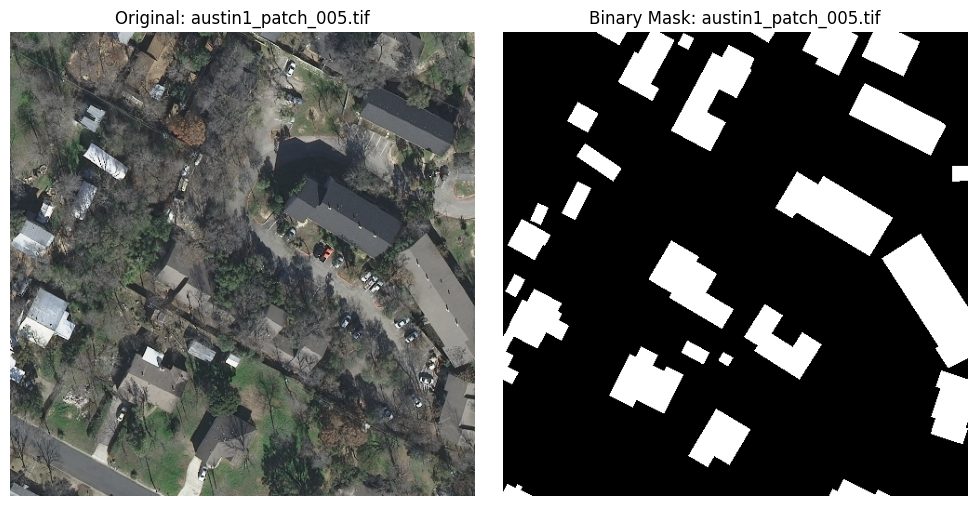

austin1/output_austin1\austin1_patch_001.tif
austin1/output_austin1_masks\austin1_patch_001.tif


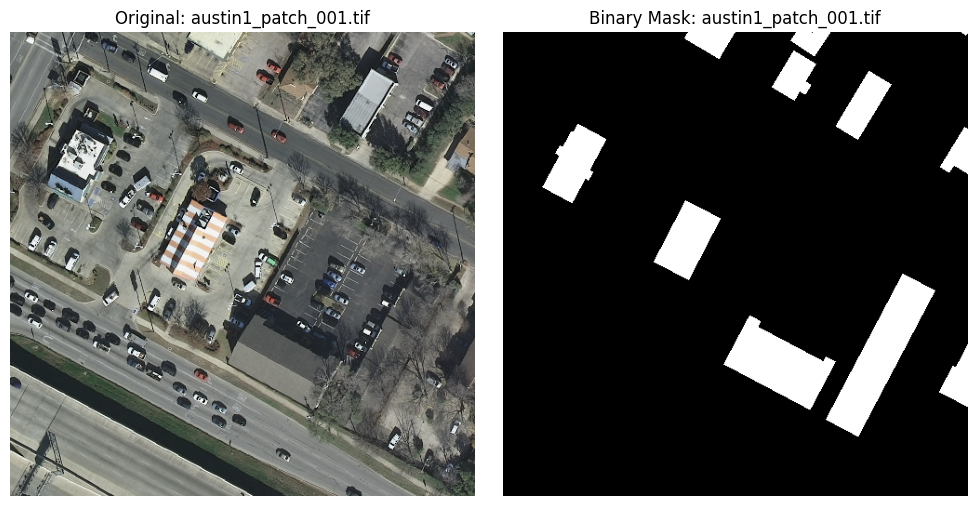

austin1/output_austin1\austin1_patch_094.tif
austin1/output_austin1_masks\austin1_patch_094.tif


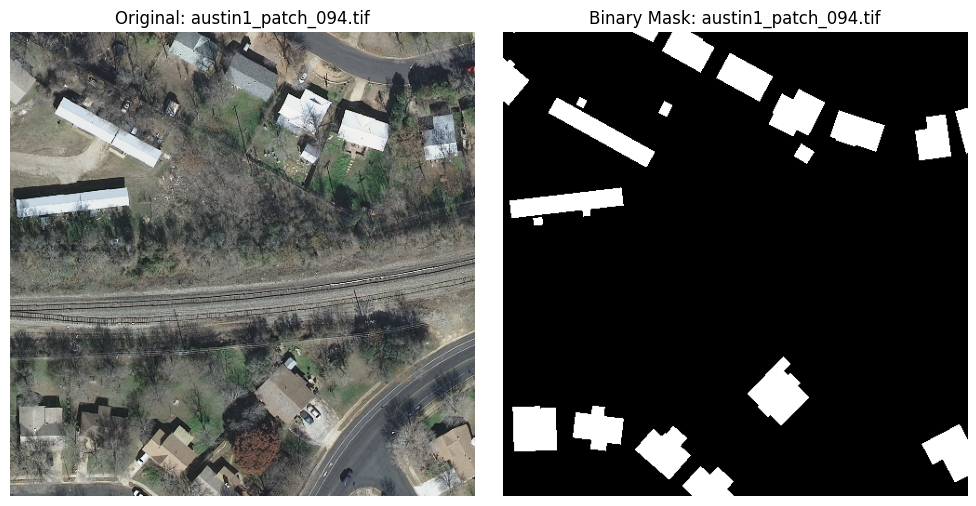

austin1/output_austin1\austin1_patch_038.tif
austin1/output_austin1_masks\austin1_patch_038.tif


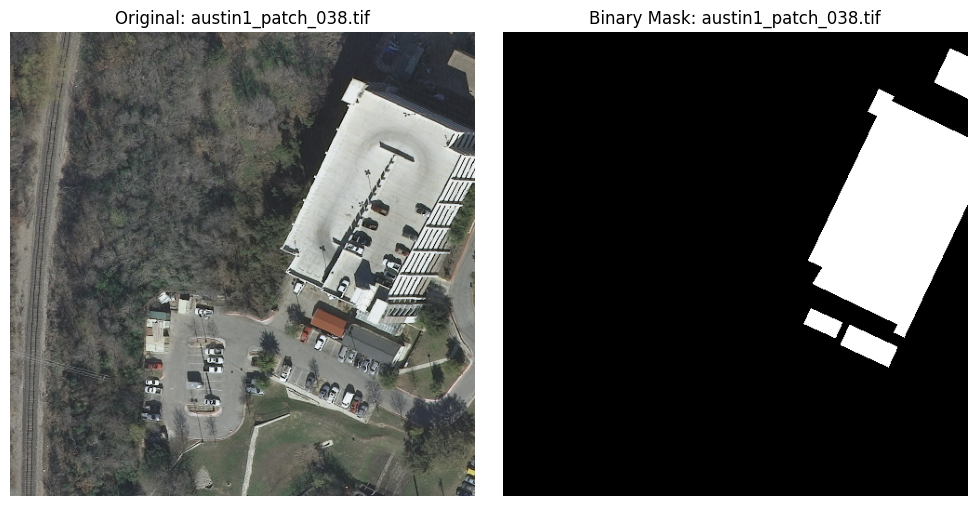

austin1/output_austin1\austin1_patch_056.tif
austin1/output_austin1_masks\austin1_patch_056.tif


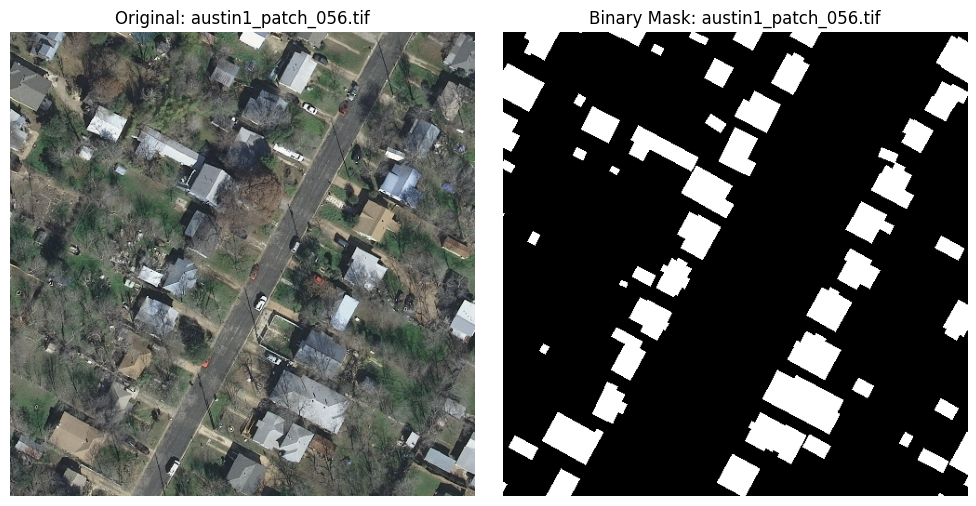

austin1/output_austin1\austin1_patch_009.tif
austin1/output_austin1_masks\austin1_patch_009.tif


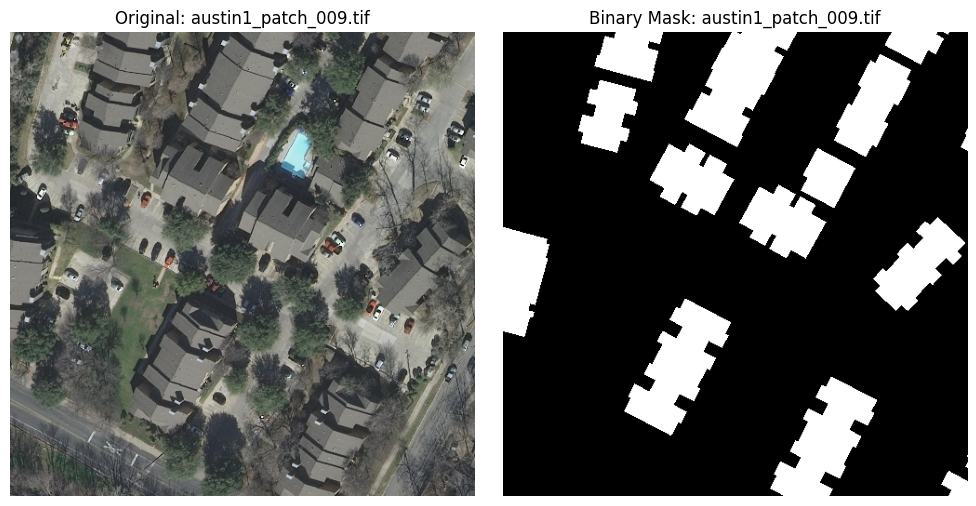

austin1/output_austin1\austin1_patch_063.tif
austin1/output_austin1_masks\austin1_patch_063.tif


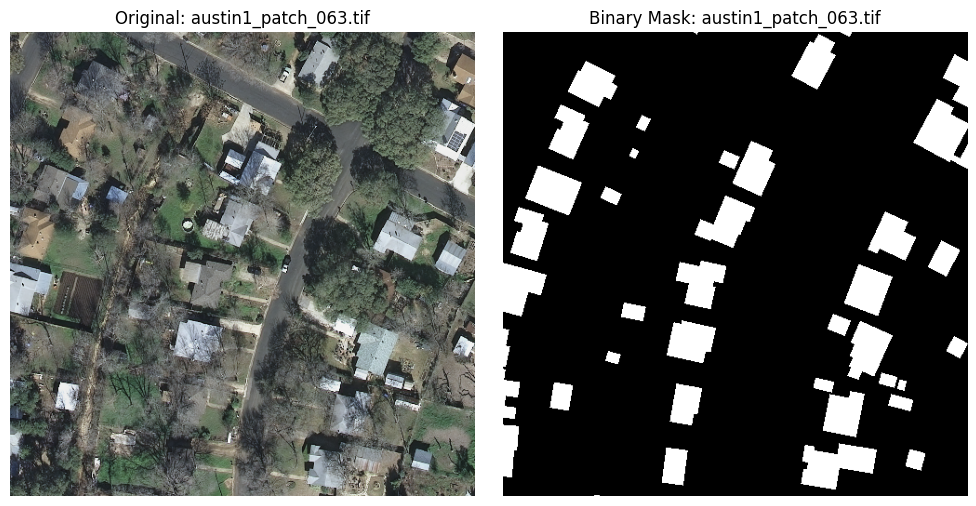

austin1/output_austin1\austin1_patch_092.tif
austin1/output_austin1_masks\austin1_patch_092.tif


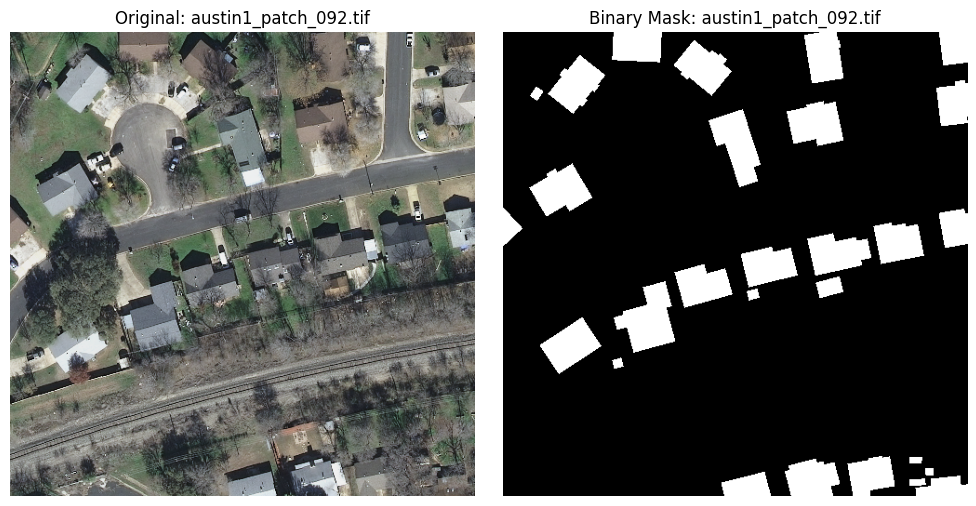

austin1/output_austin1\austin1_patch_025.tif
austin1/output_austin1_masks\austin1_patch_025.tif


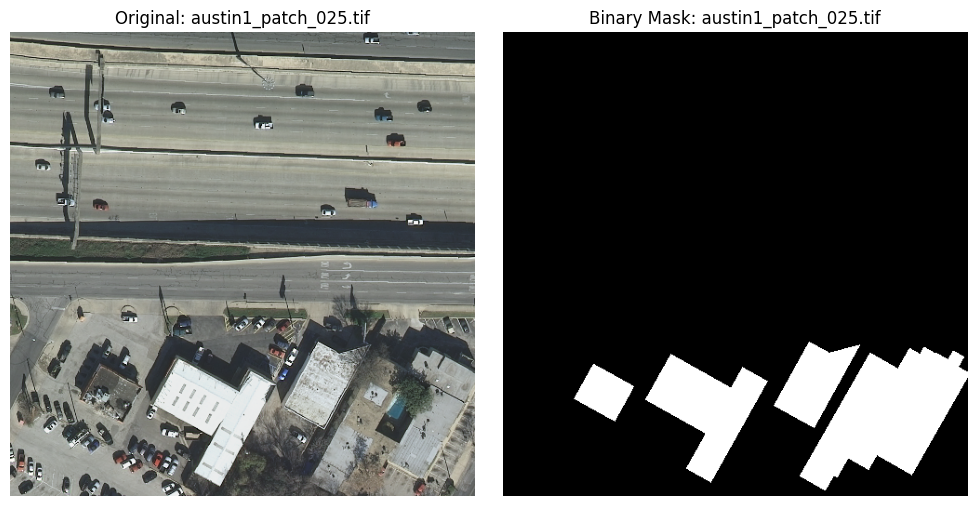

austin1/output_austin1\austin1_patch_031.tif
austin1/output_austin1_masks\austin1_patch_031.tif


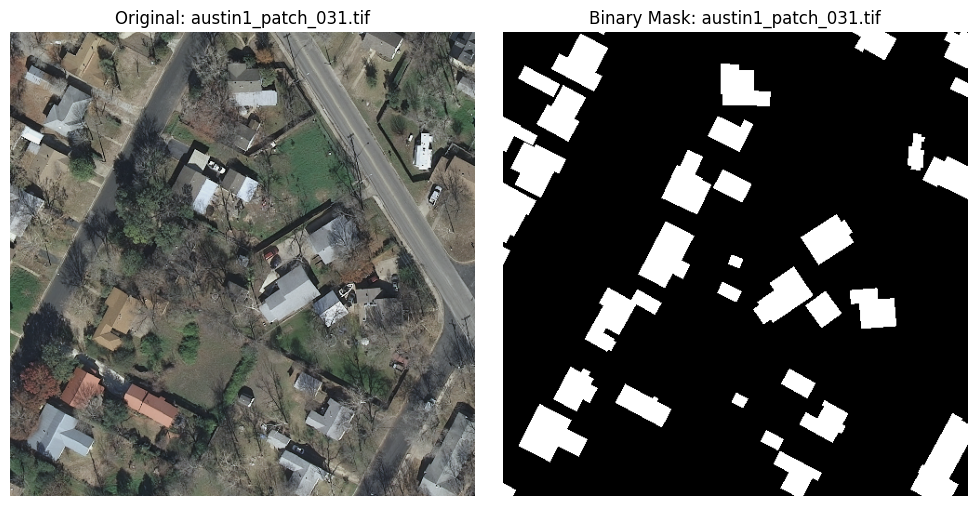

In [45]:
# Get list of available image filenames (just from original folder)
all_files = sorted([f for f in os.listdir(original_folder) if f.endswith('.tif')])

# Randomly pick 3 images
random_files = random.sample(all_files, 10)

for filename in random_files:
    original_path = os.path.join(original_folder, filename)
    print(original_path)
    mask_path = os.path.join(mask_folder, filename)
    print(mask_path)

    if not os.path.exists(mask_path):
        print(f"❌ Mask not found for {filename}")
        continue

    # Load images
    img = Image.open(original_path)
    mask = Image.open(mask_path)

    # Convert to arrays
    img_array = np.array(img)
    mask_array = np.array(mask)

    # Plot side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img_array, cmap='gray')
    axes[0].set_title(f"Original: {filename}")
    axes[0].axis('off')

    axes[1].imshow(mask_array, cmap='gray')
    axes[1].set_title(f"Binary Mask: {filename}")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

## CONVERT .PND qua file .TIF vì Model được train trên file .TIF

In [20]:
# Convert .png to .tif
from PIL import Image

image_name = "test2"  # Replace with your image name

# Open the PNG image
png_image = Image.open(image_name+".png").convert("RGB")

# Save as TIFF
png_image.save(image_name+".tif", format="TIFF")


## Cắt nhỏ hình từ Dataset trên mạng (thử nghiệm)

In [23]:
import cv2
import os

In [31]:

def chop_and_save(image_path, output_folder, patch_size=500):
    # Get the base name (e.g., "house123.tif" -> "house123")
    base_name = os.path.splitext(os.path.basename(image_path))[0]
    file_name = "austin1"
    # Create output directory
    os.makedirs(output_folder, exist_ok=True)

    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if img is None:
        print(f"Failed to read image: {image_path}")
        return

    height, width = img.shape[:2]
    count = 0

    # Chop into patches
    for y in range(0, height, patch_size):
        for x in range(0, width, patch_size):
            patch = img[y:y+patch_size, x:x+patch_size]
            
            # Ensure patch is exactly 500x500, skip edge cases or pad as needed
            if patch.shape[0] != patch_size or patch.shape[1] != patch_size:
                continue

            # Save each patch as a .tif
            patch_filename = f"{file_name}_patch_{count:03}.tif"
            patch_path = os.path.join(output_folder, patch_filename)
            cv2.imwrite(patch_path, patch)
            count += 1

    print(f"Saved {count} patches to {output_folder}")


In [42]:
chop_and_save('austin1.tif', 'austin1/output_austin1')
chop_and_save('austin1_mask.tif', 'austin1/output_austin1_masks')


Saved 100 patches to austin1/output_austin1
Saved 100 patches to austin1/output_austin1_masks
